## SAMARTH MOTKA
## 202311023
## 1/15/24

---

## AML-Assignment-1

---


#1. Support Vector Machines

Load the Iris dataset from sklearn.

● Create a scatter plot of the dataset.
The points in the dataset are of 3 classes : Setosa, Versicolour, and Virginica. Split the
dataset into train, val and test.

● Using your favorite library, train an SVM classifier to predict the class of a given
datapoint. Report the accuracy, precision, recall and f1-score.

● Modify the parameters of the SVM to get a soft-margin as well as a hard-margin
classifier. Compare the performances of the two. Tune the respective
hyperparameters to get the best results on the validation set. Which parameter
effects the hardness of the classifier?

● Apply the Gaussian, RBF and polynomial kernels to better classifier(hard-margin or soft-margin). Which kernel gives the best performance? You may need to tune
the parameters of the kernels to get the best result for each.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Ploting the iris dataset

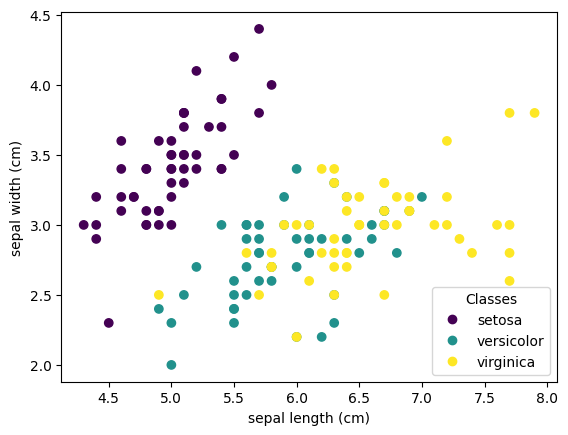

In [ ]:
grp, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
grp = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
X = iris.data
y= iris.target

# Spliting the data set into Training (70%), Validation (15%), Testing (15%) sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_rem,y_train, y_rem = train_test_split(X,y ,random_state=215,test_size=0.3)
X_val, X_test,y_val, y_test = train_test_split(X_rem,y_rem ,random_state=215,test_size=0.5)


In [ ]:
def eval(pred,y_val,st):
  print(f"Accuracy using Classic SVM on {st}" , accuracy_score(pred, y_val))
  print(f"Precision, using Classic SVM on {st}" , precision_score(pred, y_val,average='weighted'))
  print(f"Recall using Classic SVM on {st}" , recall_score(pred, y_val,average='weighted'))
  print(f"F1_score using Classic SVM on {st}" , f1_score(pred, y_val,average='weighted'))

# Trainig  SVM model with default parameters,hyperparameters and validating the model with Validation set

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report
model = SVC(C=0.2)
model.fit(X_train,y_train)
pred=model.predict(X_val)
st='Validation_set'
eval(pred,y_val,st)

Accuracy using Classic SVM on Validation_set 0.8636363636363636
Precision, using Classic SVM on Validation_set 0.922077922077922
Recall using Classic SVM on Validation_set 0.8636363636363636
F1_score using Classic SVM on Validation_set 0.868595041322314


# Testing classical SVM model

In [ ]:
pred=model.predict(X_test)
st='Testing_set'
eval(pred,y_test,st)

Accuracy using Classic SVM on Testing_set 0.9130434782608695
Precision, using Classic SVM on Testing_set 0.9378881987577641
Recall using Classic SVM on Testing_set 0.9130434782608695
F1_score using Classic SVM on Testing_set 0.914855072463768


# Hyper parameter Tunning on the model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train)

print(grid.best_params_)

grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# Training and Testing using differnt kernerls.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernels = ['linear', 'rbf', 'poly']

for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print("Accuracy using {}:".format(kernel), accuracy_score(pred, y_test))
    print("Accuracy using {}:".format(kernel), precision_score(pred, y_test, average='weighted'))
    print("Accuracy using {}:".format(kernel), recall_score(pred, y_test, average='weighted'))
    print("Accuracy using {}:".format(kernel), f1_score(pred, y_test, average='weighted'))
    print("\n")

Accuracy using linear: 1.0
Accuracy using linear: 1.0
Accuracy using linear: 1.0
Accuracy using linear: 1.0


Accuracy using rbf: 1.0
Accuracy using rbf: 1.0
Accuracy using rbf: 1.0
Accuracy using rbf: 1.0


Accuracy using poly: 1.0
Accuracy using poly: 1.0
Accuracy using poly: 1.0
Accuracy using poly: 1.0




The parameter that affects the hardness of the classifier is the regularization parameter C. It controls the trade-off between achieving a smooth decision boundary and classifying training points correctly.

Here's a breakdown of how C influences the hardness of the classifier:

* Small C (Soft-Margin SVM):

 When C is small, the SVM allows more misclassifications in the training set.
The decision boundary becomes more flexible and may include some misclassified points.
This is suitable for situations where the data might not be perfectly separable or when you want to allow some errors to achieve a more generalized model.
* Large C (Hard-Margin SVM):

 When C is large, the SVM aims to minimize misclassifications, even at the cost of a more complex decision boundary.
The model becomes less tolerant of misclassifications and tries to find a boundary that perfectly separates the classes.
This is suitable when the data is well-separated, and you want to avoid misclassifications as much as possible.






#2. Singular Value Decomposition

In [ ]:
from skimage import data
from skimage.color import rgb2gray
from ipywidgets import interact,interactive,interact_manual

In [ ]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
    "cat":rgb2gray(img_as_float(data.chelsea())),
    "astro":rgb2gray(img_as_float(data.astronaut())),
    "camera":data.camera(),
    "coin":data.coins(),
    "blobs":data.binary_blobs(),
    "coffe":rgb2gray(img_as_float(data.coffee()))
}


 ## 1. Plot any one of these images using matplotlib and extract the data matrix for this image.

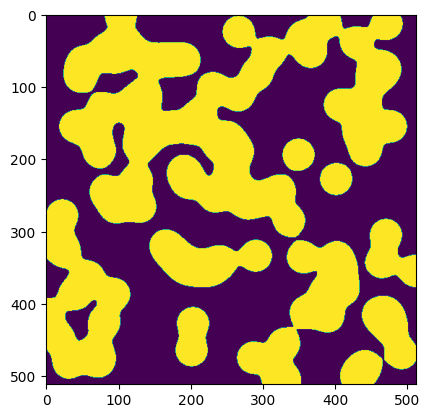

In [ ]:
img = plt.imshow(gray_images['blobs'])

In [ ]:
A = gray_images['blobs']
A

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Compute the SVD of the matrix, and compute a rank-k approximation of the image, where k is user-defined. This will be the reconstructed image

# For different values of k, plot the original image as well as the reconstructed image. How does the quality vary with k?

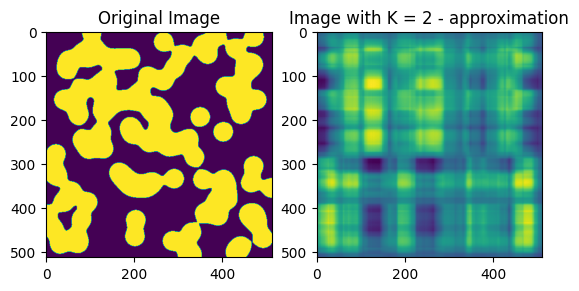

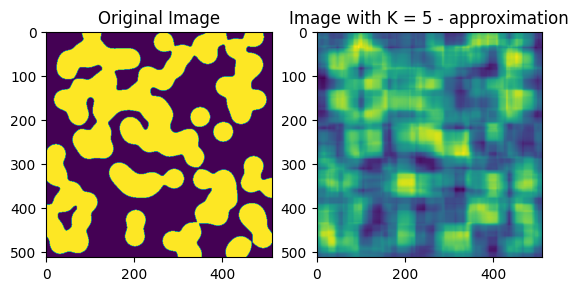

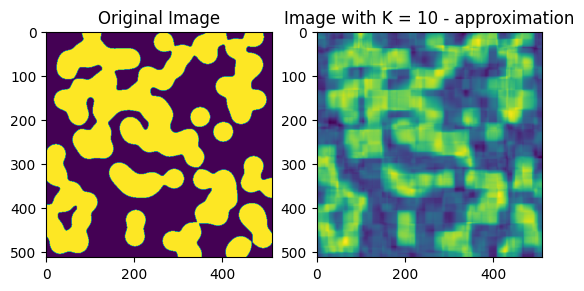

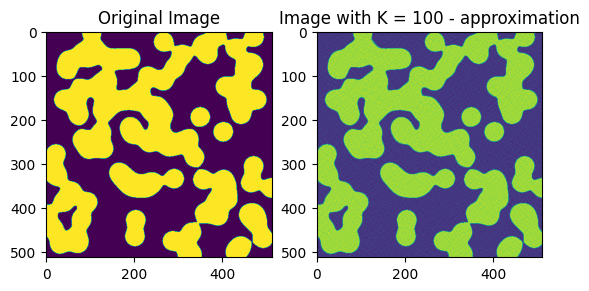

In [ ]:
# Perform SVD
U, Sigma, Vt = np.linalg.svd(A)

# Define the rank-k you want
k = [2,5,10,100]

for i in k:

# Truncate matrices to get rank-k approximation
  U_k = U[:, :i]
  Sigma_k = np.diag(Sigma[:i])
  Vt_k = Vt[:i, :]

# Reconstruct the image with rank-k approximation
  A_k = np.dot(U_k, np.dot(Sigma_k, Vt_k))

  plt.subplot(1, 2, 1)
  plt.imshow(A)  # Use 'gray' cmap for grayscale images
  plt.title('Original Image')

# Plot the second image
  plt.subplot(1, 2, 2)
  plt.imshow(A_k)  # Use 'gray' cmap for grayscale images
  plt.title(f'Image with K = {i} - approximation')

# Show the plots
  plt.show()




The values of k in singular value decomposition (SVD) represent the number of singular values retained in the rank-k approximation of the original matrix. Choosing appropriate values for k is essential in balancing the quality of approximation and the level of compression. Here's a brief explanation for the values you provided: k = [2, 5, 10, 100].


* k = 2:
  
  Reason: A small value of k (e.g., 2) often captures the major trends or patterns in the data. It provides a low-rank approximation that can still represent the essential structure of the original matrix.


* k = 100:

  Reason: Choosing a relatively large value of k (e.g., 100) means retaining a significant number of singular values. it can lead to a very high-rank approximation. In this case, the reconstructed matrix may be very close to the original, but the compression achieved is minimal in above all cases.


*
  As the value of k increases the quality of image improved because the no of singular values increases with value of K and more singular values means more information about the image.

# Note that, if the original image is of size M x N, and we are computing a k rank approximation, then we need to store the M x k left singular matrix, the N x k right singular matrix as well as k singular values. What is the compression ratio with respect to the original image? Report the compression ratio for different values of k.

In [ ]:
#Dimension of original Image
print(A.shape)

M = 512
N = 512

for i in k:
    compression_ratio = (M * N) / (M * i + N * i + i)
    print("k = {}, Compression Ratio = {:.2f}".format(i, compression_ratio))


(512, 512)
k = 2, Compression Ratio = 127.88
k = 5, Compression Ratio = 51.15
k = 10, Compression Ratio = 25.58
k = 100, Compression Ratio = 2.56


* Compression Ratio is inversely proportional to k.
As k increases, Compression Ratio decreases, meaning less compression and higher fidelity to the original data.
As k decreases, Compression Ratio increases, indicating more compression but with a potential loss of information.

#SVD for RGB Images

In [ ]:
from skimage import color
color_image = data.rocket()

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color

def svd_color(image, k):
    # Convert the color image to a floating-point format
    original_image_float = image.astype(float)

    # Separate color channels (R, G, B)
    red = original_image_float[:, :, 0]
    green = original_image_float[:, :, 1]
    blue = original_image_float[:, :, 2]

    # Perform SVD for each color channel
    u_r, s_r, vh_r = np.linalg.svd(red, full_matrices=False)
    u_g, s_g, vh_g = np.linalg.svd(green, full_matrices=False)
    u_b, s_b, vh_b = np.linalg.svd(blue, full_matrices=False)

    # Reconstruct the color channels using the selected singular values
    red_re = np.dot(u_r[:, :k], np.dot(np.diag(s_r[:k]), vh_r[:k, :]))
    green_re = np.dot(u_g[:, :k], np.dot(np.diag(s_g[:k]), vh_g[:k, :]))
    blue_re = np.dot(u_b[:, :k], np.dot(np.diag(s_b[:k]), vh_b[:k, :]))

    # Combine the reconstructed color channels to form the final image
    reconstructed_image = np.stack([red_re, green_re, blue_re], axis=-1)

    # Clip values to be in the valid range [0, 255]
    reconstructed_image = np.clip(reconstructed_image, 0, 255).astype(np.uint8)

    # Plot the original and reconstructed images
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_image)
    plt.title(f'Reconstructed Image (k-{k})')

    plt.show()


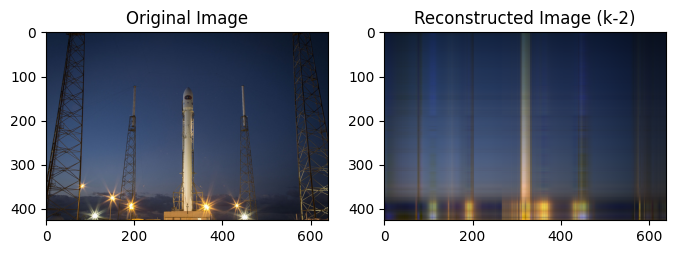

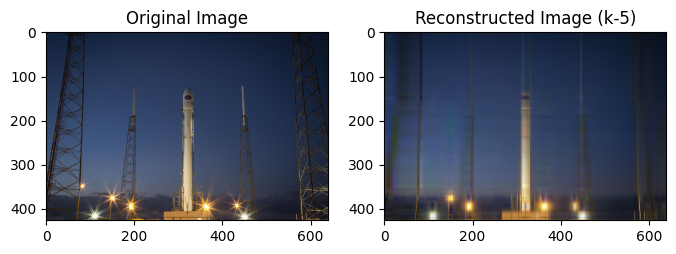

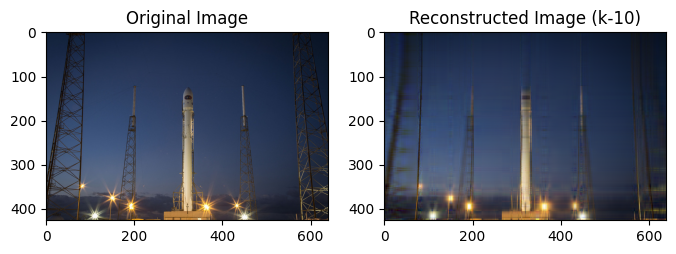

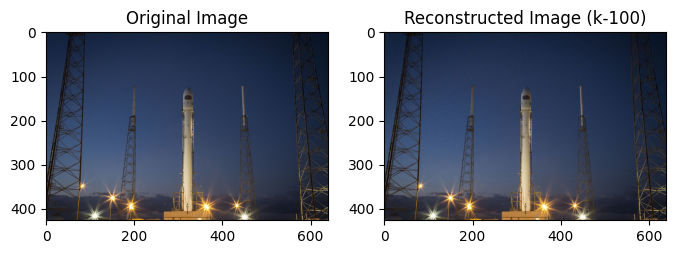

In [118]:
k_arr = [2,5,10,100]
Color_Compression = []
for k in k_arr:
  svd_color(color_image,k)